In [9]:
import investpy
from datetime import datetime
import pandas as pd
from prompt_toolkit import prompt
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from_date = input('Start date (DD/MM/YYYY): ')

Start date (DD/MM/YYYY): 01/01/2020


In [11]:
to_date = input('End date (DD/MM/YYYY): ')

End date (DD/MM/YYYY): 18/12/2020


In [12]:
btc = investpy.get_crypto_historical_data(crypto='bitcoin', from_date=from_date, to_date=to_date)
print(btc.head())

              Open    High     Low   Close  Volume Currency
Date                                                       
2020-01-01  7196.4  7259.4  7180.0  7199.8  420278      USD
2020-01-02  7199.7  7209.6  6901.4  6967.0  632778      USD
2020-01-03  6967.1  7402.9  6884.1  7343.1  936288      USD
2020-01-04  7345.1  7433.1  7291.4  7376.8  523909      USD
2020-01-05  7376.8  7501.0  7345.6  7372.5  628142      USD


In [13]:
btc.reset_index(inplace = True)
print(btc.head())

        Date    Open    High     Low   Close  Volume Currency
0 2020-01-01  7196.4  7259.4  7180.0  7199.8  420278      USD
1 2020-01-02  7199.7  7209.6  6901.4  6967.0  632778      USD
2 2020-01-03  6967.1  7402.9  6884.1  7343.1  936288      USD
3 2020-01-04  7345.1  7433.1  7291.4  7376.8  523909      USD
4 2020-01-05  7376.8  7501.0  7345.6  7372.5  628142      USD


In [14]:
csvPath = 'data/stocks'
csvName = input("Save csv as: ") + '.csv'
csvFileName = os.path.join(csvPath, csvName)
btc.to_csv(csvFileName)

Save csv as: btc


Save graph as: BTC


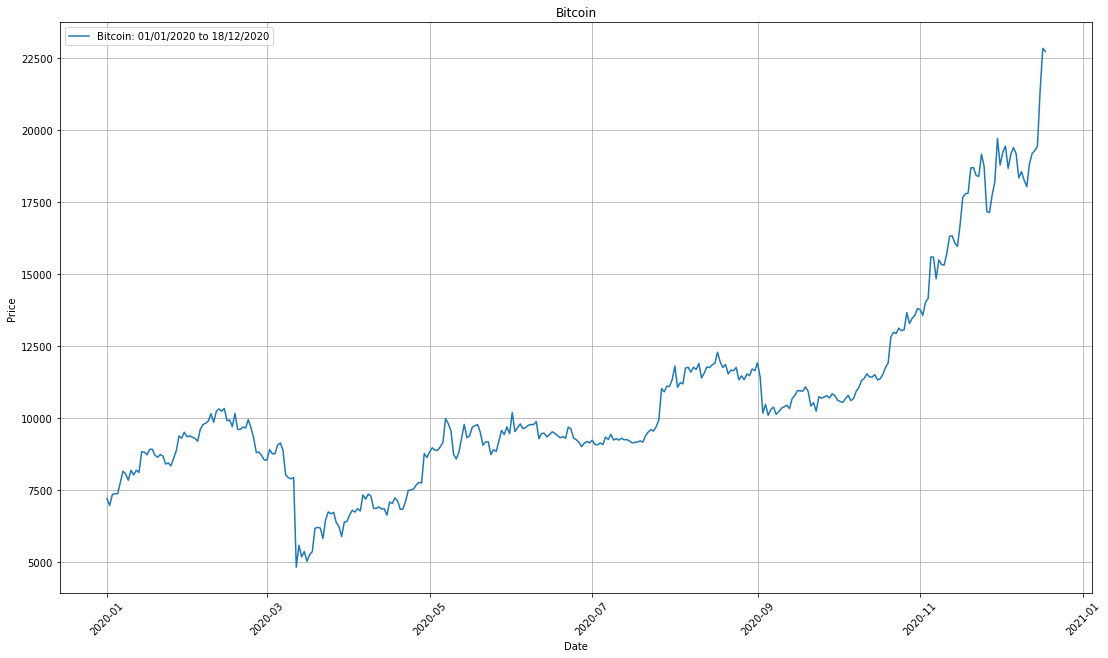

In [17]:
fig, ax = plt.subplots()
ax.plot(btc['Date'], btc['Close'], label='Bitcoin: ' + from_date + ' to ' + to_date)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.set_title('Bitcoin')
plt.xticks(rotation=45)
# plt.text(x=1970, y=400, s=r'Stock Price at this interval')
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend(loc='upper left')
graphPath = 'data/stocks'
graphName = input('Save graph as: ') + '.png'
graphFileName = os.path.join(graphPath, graphName)
plt.savefig(graphFileName)